# ESTADISTICOS PARA DATOS AGRUPADOS:

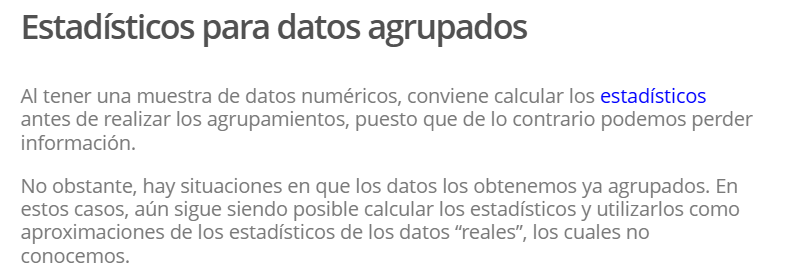

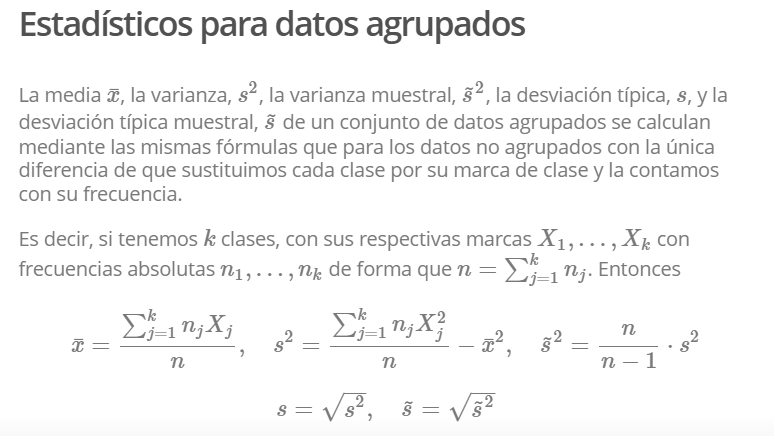

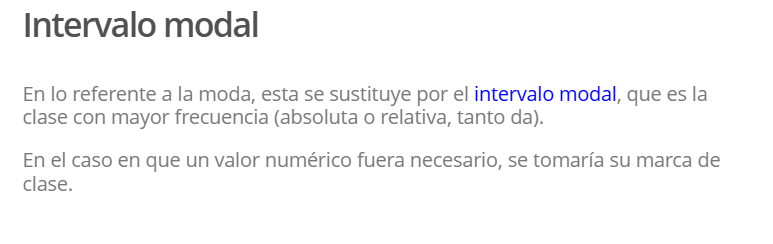

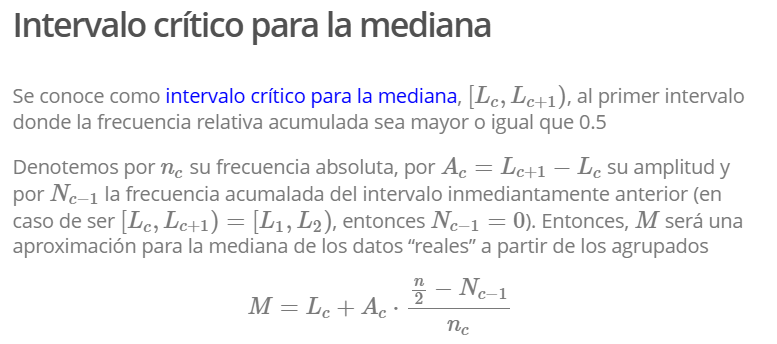

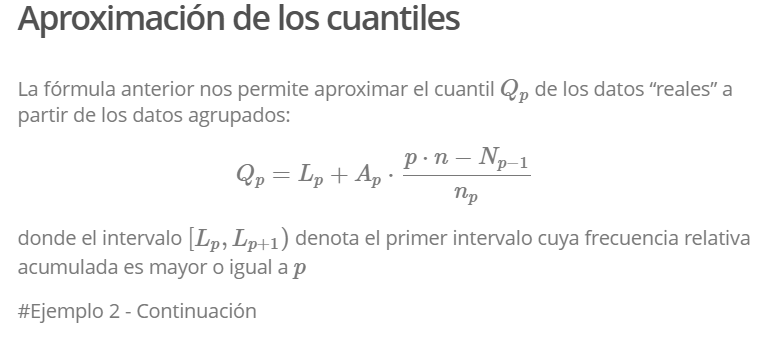

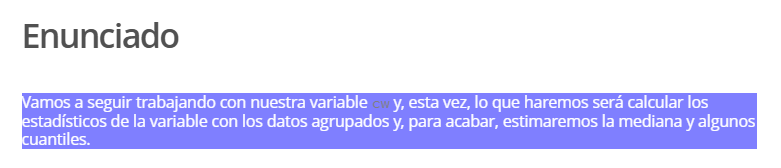

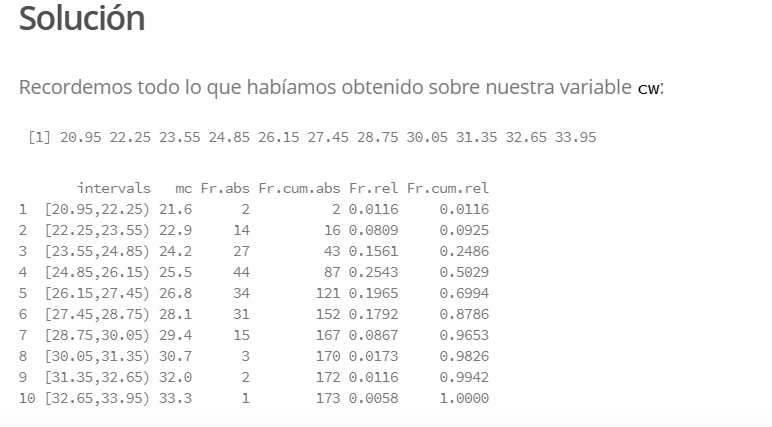

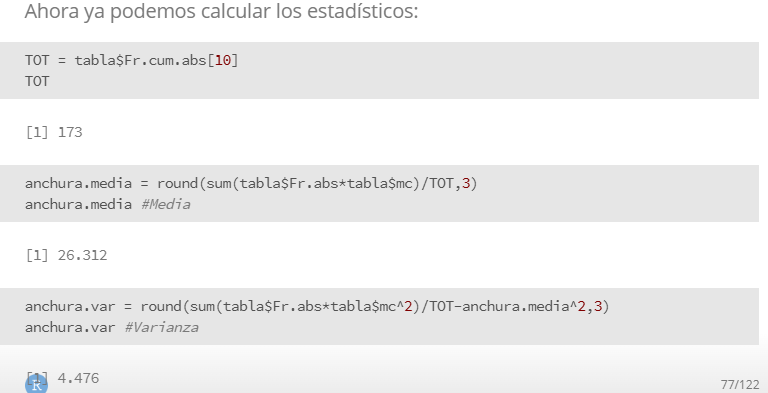

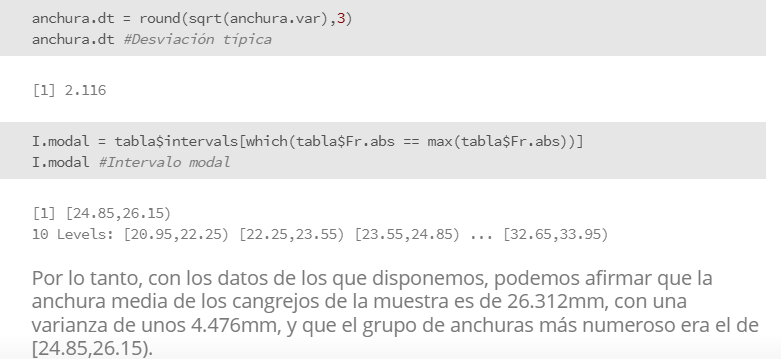

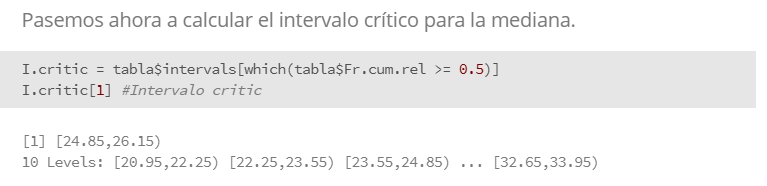

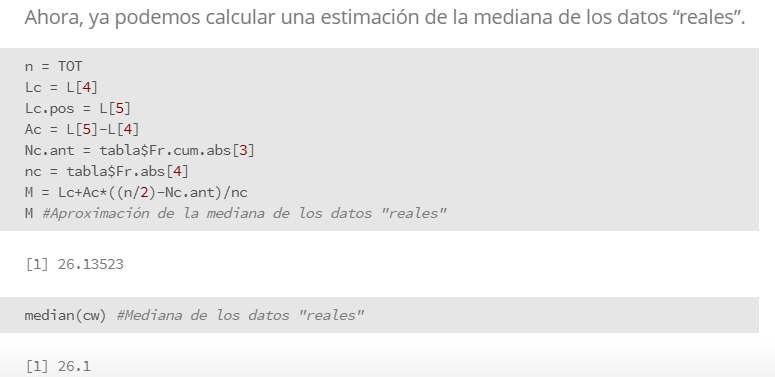

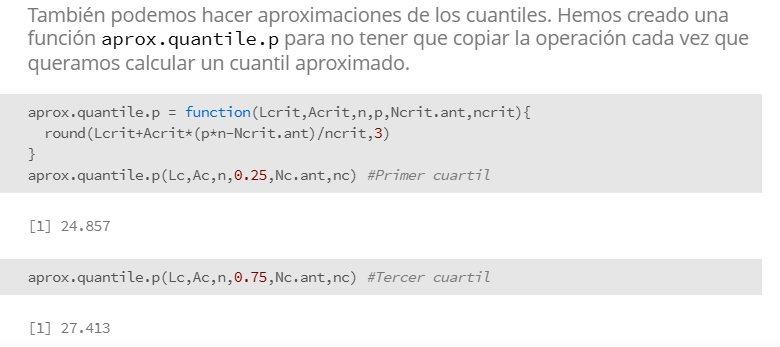

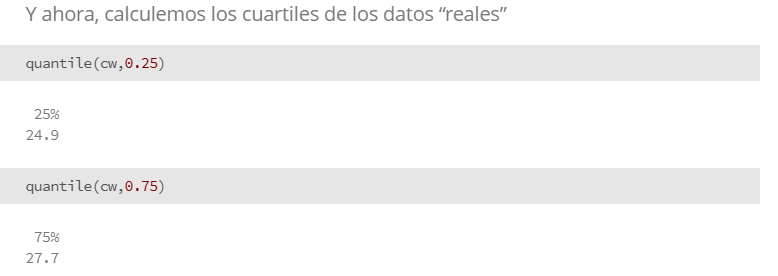

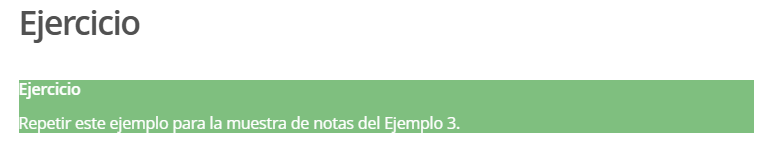

# EJEMPLO: Calcular los estadisticos de datos agrupados:

In [2]:
#Primera función
TablaFrecs = function(x,k,A,p){ 
  L = min(x)-p/2+A*(0:k)
  x_cut = cut(x, breaks = L, right=FALSE)
  intervals = levels(x_cut) 
  mc = (L[1]+L[2])/2+A*(0:(k-1))
  Fr.abs = as.vector(table(x_cut)) 
  Fr.rel = round(Fr.abs/length(x),4) 
  Fr.cum.abs = cumsum(Fr.abs) 
  Fr.cum.rel = cumsum(Fr.rel)
  tabla = data.frame(intervals, mc, Fr.abs, Fr.cum.abs, Fr.rel, Fr.cum.rel)
  tabla
  }

In [5]:
crabs = read.table("base de datos/datacrab.txt", header = TRUE)

cw = crabs$width # variable que contiene datos de la variable width (anchura de los cangrejos en mm)

# 1. elegir numero de intervalos:
nIntervalos = nclass.scott(cw)

# 2. elegir amplitud de intervalos:
A = diff(range(cw)) / 10
A = 1.3 # debemos redondear por exceso a un cifra decimal el resultado obtenido. 

# 3. Calcular los extremos de los intervalos:
L1 = min(cw)-1/2*0.1 #donde 0.1 es nuestra precisión (décimas de unidad, en este caso).
L = L1 + A*(0:10) # calcular el resto de intervalos

# 4. Calcular las marcas de clase:
X1 = (L[1]+L[2])/2
X = (L[1:length(L)-1]+L[2:length(L)])/2

tabla = TablaFrecs(cw, nIntervalos, A, 0.1)

In [ ]:
TOT = tabla$Fr.cum.abs[10]    #ultimo valor de la frecuencia acumulada
TOT

[1] 173

In [7]:
anchura.media = round(sum(tabla$Fr.abs*tabla$mc)/TOT,3)
anchura.media #Media (media para datos agrupados)

[1] 26.312

In [8]:
anchura.var = round(sum(tabla$Fr.abs*tabla$mc^2)/TOT-anchura.media^2,3)
anchura.var #Varianza para datos agrupados

[1] 4.476

In [9]:
anchura.dt = round(sqrt(anchura.var),3)
anchura.dt #Desviación típica para datos agrupados

[1] 2.116

In [10]:
I.modal = tabla$intervals[which(tabla$Fr.abs == max(tabla$Fr.abs))] #en que frecuencia se encuetra la frecuaencia absoluta
I.modal #Intervalo modal  (moda para datos agrupados)

[1] "[24.9,26.1)"

Por lo tanto, con los datos de los que disponemos, podemos afirmar que la anchura media de los cangrejos de la muestra es de 26.312mm, con una varianza de unos 4.476mm, y que el grupo de anchuras más numeroso era el de [24.85,26.15).

In [11]:
# Pasemos ahora a calcular el intervalo crítico para la mediana.
I.critic = tabla$intervals[which(tabla$Fr.cum.rel >= 0.5)]
I.critic[1] #Intervalo critic

[1] "[24.9,26.1)"

In [13]:
# calcular una estimación de la mediana de los datos “reales”.
n = TOT
Lc = L[4]
Lc.pos = L[5]
Ac = L[5]-L[4]
Nc.ant = tabla$Fr.cum.abs[3]
nc = tabla$Fr.abs[4]
M = Lc+Ac*((n/2)-Nc.ant)/nc
round(M,3) #Aproximación de la mediana de los datos "reales"


[1] 26.135

In [14]:
# mediana real:
median(cw)

[1] 26.1

In [15]:
# proximaciones de los cuantiles.
aprox.quantile.p = function(Lcrit,Acrit,n,p,Ncrit.ant,ncrit){
  round(Lcrit+Acrit*(p*n-Ncrit.ant)/ncrit,3)
}

[1] 24.857

In [21]:
# aproximacion del 1er quantil:
aprox.quantile.p(Lc,Ac,n,0.25,Nc.ant,nc)  #Primer cuartil

[1] 24.857

In [19]:
# 1er cuantil real:
quantile(cw, 0.25)

25% 
24.9

In [16]:
# aproximacion del 3er quantil:
aprox.quantile.p(Lc,Ac,n,0.75,Nc.ant,nc) 

[1] 27.413

In [20]:
# 3er cuantil real:
quantile(cw, 0.75)

75% 
27.7

In [22]:
# aproximacion de la  mediana 
aprox.quantile.p(Lc,Ac,n,0.25,Nc.ant,nc)  #mediana

[1] 24.857

In [23]:
quantile(cw, 0.5)

50% 
26.1

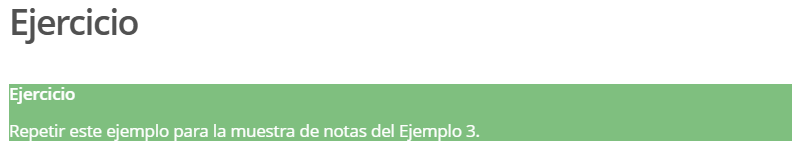